# Kickstarting Your Machine Learning Journey
Welcome to this simple machine learning notebook! 🚀 Here, we'll learn about:
1. **Classification** using the Titanic dataset (e.g., predicting if a passenger survived).
2. **Regression** using the Tips dataset (e.g., predicting the tip amount).

We'll follow step-by-step explanations with easy-to-understand code. Let's get started!


## Classification: Titanic Dataset


### Step 1: Import Libraries



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Set a beautiful seaborn theme
sns.set_theme(style="darkgrid", palette="coolwarm", font_scale=1.2)


## Step 2: Load and Explore Data

### Load the Titanic dataset and check its structure.

In [3]:
# Load Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Show the first few rows
print("First 5 rows of the dataset:")
titanic_df.head()

# Basic dataset information
print("\nDataset Information:")
titanic_df.info()

# Check target variable distribution
print("\nSurvival Distribution:")
print(titanic_df['survived'].value_counts(normalize=True))


First 5 rows of the dataset:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Survival Distribution:
surv

In [9]:
titanic_df.isnull().sum()

survived         0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
family_size      0
is_alone         0
sex_male         0
embarked_Q       0
embarked_S       0
pclass_2         0
pclass_3         0
dtype: int64

# Step 3: Preprocess Data
### Clean and prepare the data for modeling.

In [5]:
# Handle missing values
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['fare'].fillna(titanic_df['fare'].median(), inplace=True)

# Create new features
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch'] + 1
titanic_df['is_alone'] = (titanic_df['family_size'] == 1).astype(int)

# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['sex', 'embarked', 'pclass'], drop_first=True)

# Show updated dataset
titanic_df.head()


,survived,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,family_size,is_alone,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,2,0,True,False,True,False,True
1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,2,0,False,False,False,False,False
2,1,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,1,1,False,False,True,False,True
3,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,2,0,False,False,True,False,False
4,0,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1,1,True,False,True,False,True


# Step 4: Define Features and Target
### Explain what features and target variables are.



In [6]:
# Select features and target
features = ['age', 'fare', 'family_size', 'is_alone', 
            'sex_male', 'embarked_Q', 'embarked_S', 
            'pclass_2', 'pclass_3']
X = titanic_df[features]
y = titanic_df['survived']

print(f"Features: {features}")
print(f"Target: 'survived'")


Features: ['age', 'fare', 'family_size', 'is_alone', 'sex_male', 'embarked_Q', 'embarked_S', 'pclass_2', 'pclass_3']
Target: 'survived'


# Step 5: Split Data and Train the Model
### Train a simple logistic regression model.



In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

# Step 6: Evaluate the Model
### Generate a classification report and confusion matrix.

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



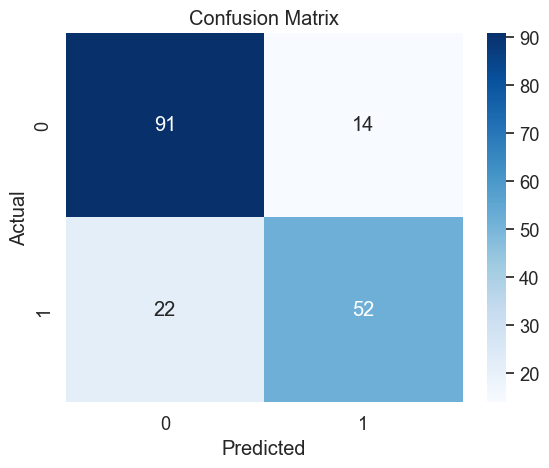

In [8]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
